## **Phase 1: Data Loading & Initial Exploration**

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix

from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

from imblearn.over_sampling import SMOTE, RandomOverSampler, ADASYN
from imblearn.under_sampling import RandomUnderSampler, TomekLinks
from imblearn.combine import SMOTEENN, SMOTETomek

In [17]:
# Load dataset
# Note: df is short for dataframe for pandas dataframe
df = pd.read_csv("../data/WA_Fn-UseC_-Telco-Customer-Churn.csv")
# See the first 5 rows
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [18]:
# See how many rows and columns
df.shape

(7043, 21)

In [19]:
# See column names and types
df.info()

# Notes:
# Dtype => Data Type
# object = Text (strings) or mixed data. Pandas uses object for things that aren’t purely numbers.
# Non-Null Count => Number of non-null values in the column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## **Phase 2: Data Quality Assessment**

In [20]:
#  Count missing values in each column
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [21]:
# Check for duplicate customers
df.duplicated().sum()

np.int64(0)

In [22]:
# See current data types
df.dtypes

# Conclusion:
# - TotalCharges is object, not float

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

## **Phase 3: Data Cleaning**

In [23]:
# Convert 'TotalCharges' to numeric, some rows may be blank
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
# Note: errors='coerce' means that if the conversion fails, the value will be set to NaN

# Now check again for missing values
df.isnull().sum()

# Drop rows with missing TotalCharges
df = df.dropna()

# Check shapes
df.shape

(7032, 21)

In [24]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

## **Phase 4: Data Visualization & Exploration**

Text(0.5, 1.0, 'Churn by Contract Type')

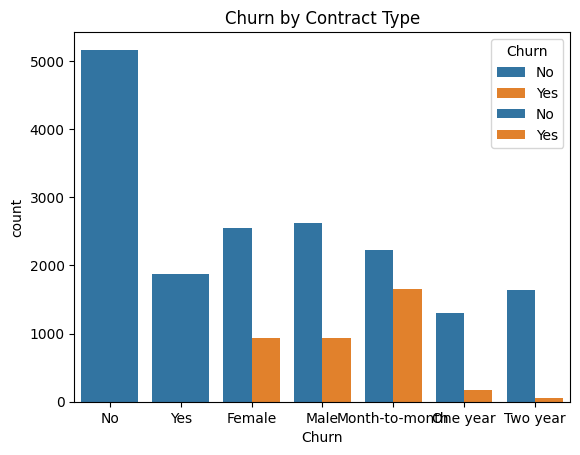

In [25]:
# Plot churn count
sns.countplot(x='Churn', data=df)
plt.title("Churn Count")

# Plot churn by gender
sns.countplot(x='gender', hue='Churn', data=df)
plt.title("Churn by Gender")

# Plot churn by Contract type
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title("Churn by Contract Type")

In [26]:
# # Function to evaluate model performance
# def evaluate_model(model, X_test, y_test, model_name):
#     """Evaluate model and print comprehensive metrics"""
#     y_pred = model.predict(X_test)
#     y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None
    
#     print(f"\n=== {model_name} Performance ===")
#     print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
#     print(f"Precision: {precision_score(y_test, y_pred):.4f}")
#     print(f"Recall: {recall_score(y_test, y_pred):.4f}")
#     print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")
    
#     if y_pred_proba is not None:
#         print(f"ROC-AUC Score: {roc_auc_score(y_test, y_pred_proba):.4f}")
    
#     print("\nConfusion Matrix:")
#     print(confusion_matrix(y_test, y_pred))
#     print("\nClassification Report:")
#     print(classification_report(y_test, y_pred))
    
#     return y_pred




In [27]:
# # Model comparison visualization
# fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# # Confusion matrix for Logistic Regression
# cm_lr = confusion_matrix(y_test, lr_predictions)
# sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', ax=axes[0])
# axes[0].set_title('Logistic Regression - Confusion Matrix')
# axes[0].set_xlabel('Predicted')
# axes[0].set_ylabel('Actual')

# # Confusion matrix for SVM
# cm_svm = confusion_matrix(y_test, svm_predictions)
# sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Greens', ax=axes[1])
# axes[1].set_title('SVM - Confusion Matrix')
# axes[1].set_xlabel('Predicted')
# axes[1].set_ylabel('Actual')

# plt.tight_layout()
# plt.show()

# # Performance comparison summary
# models_performance = {
#     'Model': ['Logistic Regression', 'SVM'],
#     'Accuracy': [
#         accuracy_score(y_test, lr_predictions),
#         accuracy_score(y_test, svm_predictions)
#     ],
#     'Precision': [
#         precision_score(y_test, lr_predictions),
#         precision_score(y_test, svm_predictions)
#     ],
#     'Recall': [
#         recall_score(y_test, lr_predictions),
#         recall_score(y_test, svm_predictions)
#     ],
#     'F1-Score': [
#         f1_score(y_test, lr_predictions),
#         f1_score(y_test, svm_predictions)
#     ]
# }

# comparison_df = pd.DataFrame(models_performance)
# print("\n=== Model Performance Comparison ===")
# print(comparison_df.round(4))


## **Phase 5: Data Preprocessing**

In [28]:
# Drop customerID (not useful)
df.drop(['customerID'], axis=1, inplace=True)


In [29]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print(num_cols)
print(categorical_cols)

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


In [ ]:
# Dynamic column classification based on data types and unique values
feature_cols = [col for col in categorical_cols if col != 'Churn']
target_col = 'Churn'

# Binary columns: columns with only 2 unique values (Yes/No)
binary_cols = []
for col in feature_cols:
    unique_vals = df[col].nunique()
    if unique_vals == 2:
        binary_cols.append(col)

# One-hot columns: columns with more than 2 unique values
onehot_cols = []
for col in feature_cols:
    unique_vals = df[col].nunique()
    if unique_vals > 2:
        onehot_cols.append(col)

print("Binary columns (2 unique values):", binary_cols)
print("One-hot columns (>2 unique values):", onehot_cols)

Binary columns (2 unique values): ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
One-hot columns (>2 unique values): ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']


In [31]:
# Numerical pipeline
num_pipeline = Pipeline([ # pipeline means create a step-by-step process
    ('imputer', SimpleImputer(strategy='median')) # replace missing num with middle value
])

# OneHot pipeline (for nominal categorical features)
onehot_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('one_hot_encoding', OneHotEncoder())
])

# Binary/Ordinal pipeline
binary_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('binary_encoding', OrdinalEncoder())
])

# Master controller that decides which columns go to which processing station
processing = ColumnTransformer([
    ('num', num_pipeline, num_cols),
    ('onehot', onehot_pipeline, onehot_cols),
    ('ordinal', binary_pipeline, binary_cols)
], remainder='passthrough')

processing

ColumnTransformer(remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median'))]),
                                 ['SeniorCitizen', 'tenure', 'MonthlyCharges',
                                  'TotalCharges']),
                                ('onehot',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('one_hot_encoding',
                                                  OneHotEncoder())]),
                                 ['MultipleLines', 'InternetService',
                                  'OnlineSecurity', 'OnlineBackup',
                                  'DeviceProtection', 'TechSupport',
                                  'StreamingTV', 'StreamingMovies', 'Contract',
                                  'PaymentMethod']),
                                ('ordinal',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('binary_encoding',
                                                  OrdinalEncoder())]),
                                 ['gender', 'Partner', 'Dependents',
                                  'PhoneService', 'PaperlessBilling'])])

In [ ]:
# Separate What You Want to Predict
X = df.drop('Churn', axis=1)  # Everything EXCEPT 'Churn' column
y = df['Churn']               # ONLY the 'Churn' column

# Note:
# Why X and y?
# This comes from math notation: y = f(X) means "y depends on X"
# X: Independent variables (customer info)
# y: Dependent variable (churn yes/no)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Clean the data
X_train_cleaned = processing.fit_transform(X_train)
X_test_cleaned = processing.transform(X_test)

# Convert target labels to numerical for XGBoost
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [33]:
# Test if data is preprocessed
print("Original shape:", X_train.shape)
print("Processed shape:", X_train_cleaned.shape)

# If OneHot worked, processed data should have MORE columns
# Example: Original (7000, 20) → Processed (7000, 45)

Original shape: (5625, 19)
Processed shape: (5625, 40)


In [34]:
# Another way to test if data is preprocessed
# Test 1: All numbers?
processed_sample = pd.DataFrame(X_train_cleaned)
print("Any non-numeric values?", processed_sample.select_dtypes(include=['object']).shape[1] > 0)

# Test 2: Can we scale without errors?
try:
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(X_train_cleaned)
    print("✅ Pipeline worked! Data is ready for ML")
except ValueError as e:
    print(f"❌ Pipeline failed: {e}")

Any non-numeric values? False
✅ Pipeline worked! Data is ready for ML


In [35]:
# Check if your data is imbalanced
print("Churn distribution:")
print(y_train.value_counts())
print("\nPercentages:")
print(y_train.value_counts(normalize=True) * 100)

Churn distribution:
Churn
No     4130
Yes    1495
Name: count, dtype: int64

Percentages:
Churn
No     73.422222
Yes    26.577778
Name: proportion, dtype: float64


In [36]:
# Resampling because the data is imbalanced
smote = SMOTE(random_state=12)
X_resampled, y_resampled = smote.fit_resample(X_train_cleaned, y_train)

# Notes:
# SMOTE = "Synthetic Minority Oversampling TEchnique"
# What it means: "I'm a tool that creates fake examples of rare cases"

# Scaling
scaler = StandardScaler()
X_resampled_scaled = scaler.fit_transform(X_resampled)
X_test_scaled = scaler.transform(X_test_cleaned)

## **Phase 6: Model Training**

In [49]:
# Train Logistic Regression model
print("Training Logistic Regression model...")
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_resampled_scaled, y_resampled)

# Train SVM model  
print("Training SVM model...")
svm_model = SVC(kernel='rbf', random_state=42, probability=True)
svm_model.fit(X_resampled_scaled, y_resampled)

# Train XGBoost model
print("Training XGBoost model...")
# Calculate class weight for imbalanced data
pos_weight = (y_train == 'No').sum() / (y_train == 'Yes').sum()
xgb_model = XGBClassifier(
    scale_pos_weight=pos_weight,
    random_state=42,
    eval_metric='logloss'
)
xgb_model.fit(X_train_cleaned, y_train_encoded)

# Note: xgb model handle imbalanced data better internally through scale_pos_weight

print("Model training completed!")


Training Logistic Regression model...
Training SVM model...
Training XGBoost model...
Model training completed!


## **Phase 7: Model Evaluation**

In [50]:
# Make predictions
y_pred_lr = lr_model.predict(X_test_scaled)
y_pred_svm = svm_model.predict(X_test_scaled)
y_pred_xgb_encoded = xgb_model.predict(X_test_cleaned)
y_pred_xgb = label_encoder.inverse_transform(y_pred_xgb_encoded)  # Convert back to 'Yes'/'No'

In [52]:
# Logistic Regression
print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Precision:", precision_score(y_test, y_pred_lr, pos_label='Yes'))  # 'Yes' = churn
print("Recall:", recall_score(y_test, y_pred_lr, pos_label='Yes'))       # 'Yes' = churn
print("F1 Score:", f1_score(y_test, y_pred_lr, pos_label='Yes'))        # 'Yes' = churn
print("ROC AUC:", roc_auc_score(y_test, lr_model.predict_proba(X_test_scaled)[:,1]))
print(classification_report(y_test, y_pred_lr))

# SVM
print("\nSVM:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Precision:", precision_score(y_test, y_pred_svm, pos_label='Yes'))  # 'Yes' = churn
print("Recall:", recall_score(y_test, y_pred_svm, pos_label='Yes'))       # 'Yes' = churn
print("F1 Score:", f1_score(y_test, y_pred_svm, pos_label='Yes'))        # 'Yes' = churn
print("ROC AUC:", roc_auc_score(y_test, svm_model.predict_proba(X_test_scaled)[:,1]))
print(classification_report(y_test, y_pred_svm))

Logistic Regression:
Accuracy: 0.728500355366027
Precision: 0.49333333333333335
Recall: 0.7914438502673797
F1 Score: 0.6078028747433265
ROC AUC: 0.8334571441883099
              precision    recall  f1-score   support

          No       0.90      0.71      0.79      1033
         Yes       0.49      0.79      0.61       374

    accuracy                           0.73      1407
   macro avg       0.70      0.75      0.70      1407
weighted avg       0.79      0.73      0.74      1407


SVM:
Accuracy: 0.7661691542288557
Precision: 0.551487414187643
Recall: 0.6443850267379679
F1 Score: 0.594327990135635
ROC AUC: 0.8054314571027742
              precision    recall  f1-score   support

          No       0.86      0.81      0.84      1033
         Yes       0.55      0.64      0.59       374

    accuracy                           0.77      1407
   macro avg       0.71      0.73      0.72      1407
weighted avg       0.78      0.77      0.77      1407



In [53]:
# XGBoost
print("\nXGBoost:")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Precision:", precision_score(y_test, y_pred_xgb, pos_label='Yes'))
print("Recall:", recall_score(y_test, y_pred_xgb, pos_label='Yes'))
print("F1 Score:", f1_score(y_test, y_pred_xgb, pos_label='Yes'))
print("ROC AUC:", roc_auc_score(y_test_encoded, xgb_model.predict_proba(X_test_cleaned)[:,1]))
print(classification_report(y_test, y_pred_xgb))


XGBoost:
Accuracy: 0.7427149964463398
Precision: 0.5122448979591837
Recall: 0.6711229946524064
F1 Score: 0.5810185185185185
ROC AUC: 0.8103765575578115
              precision    recall  f1-score   support

          No       0.87      0.77      0.81      1033
         Yes       0.51      0.67      0.58       374

    accuracy                           0.74      1407
   macro avg       0.69      0.72      0.70      1407
weighted avg       0.77      0.74      0.75      1407

